# Setup

In [1]:
# Import packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [2]:
# Lode dataset
dataset = pd.read_csv("churn_data.csv")
dataset.shape

(27000, 31)

# Data preprocessing

In [3]:
dataset.head(5)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
# Handle NAs
dataset = dataset[pd.notnull(dataset["age"])]
dataset = dataset.drop(columns=["credit_score", "rewards_earned"])
dataset.isna().any()

user                       False
churn                      False
age                        False
housing                    False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
reward_rate                False
is_referred                False
dtype: bool

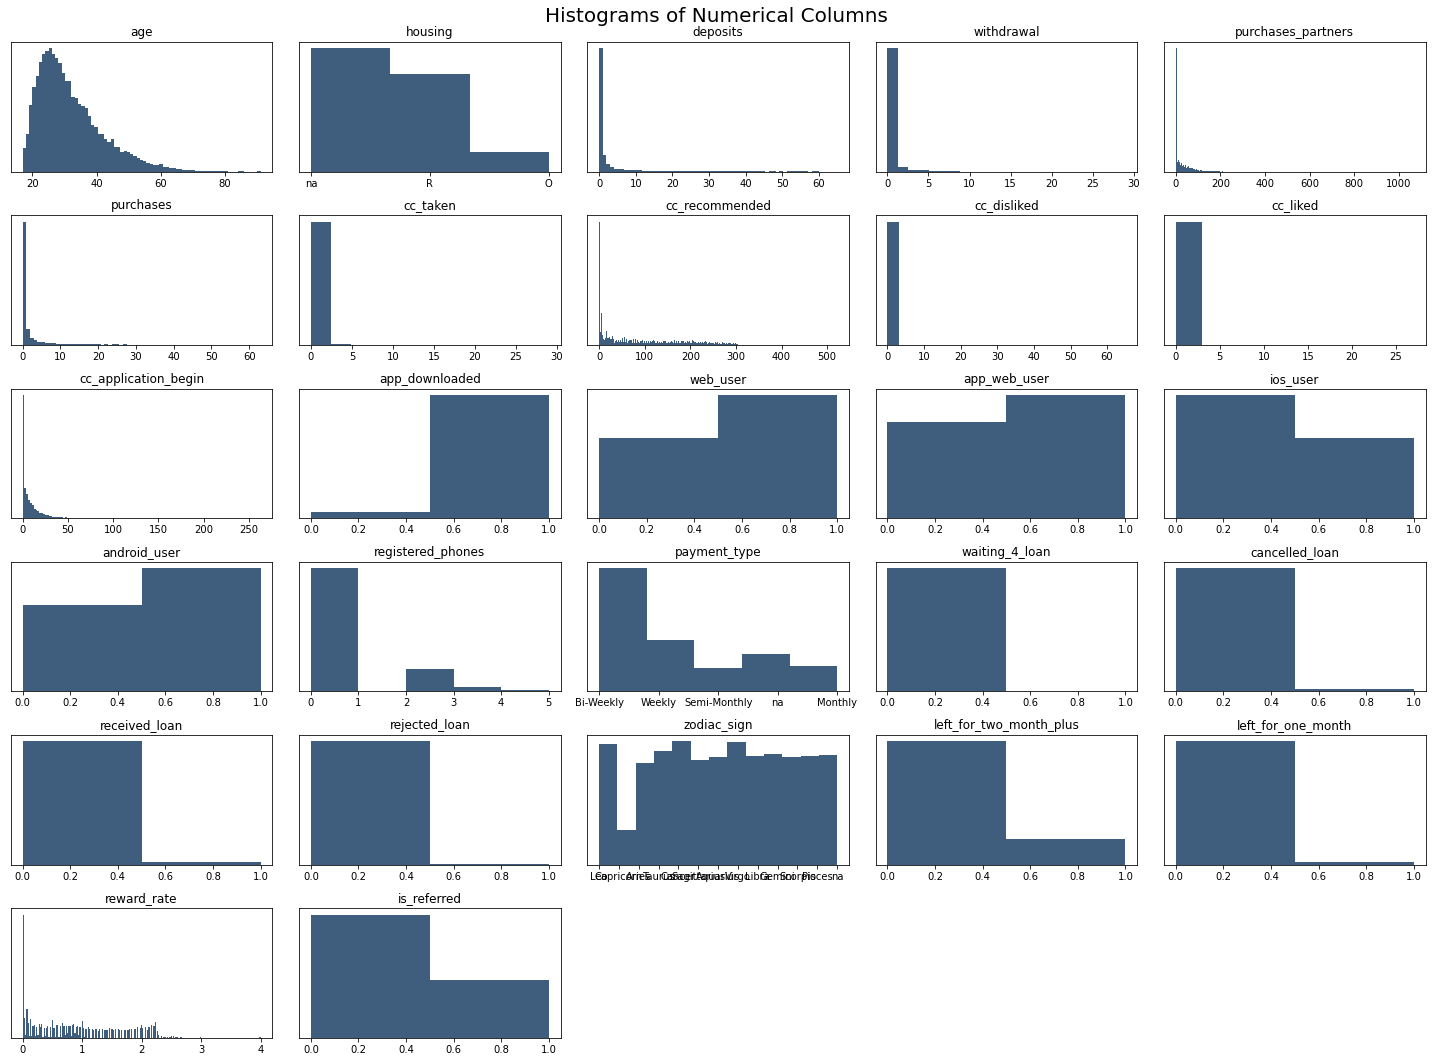

In [9]:
# Visualize data distribution
dataset2 = dataset.drop(columns = ["user", "churn"])

fig = plt.figure(figsize=(20, 15))
plt.suptitle("Histograms of Numerical Columns", fontsize=20)

for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color="#3F5D7D")
plt.tight_layout(rect=[0, 0, 1, 1])

<ipython-input-10-e7e1c10668ea>:18: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels = index, autopct="%1.1f%%")


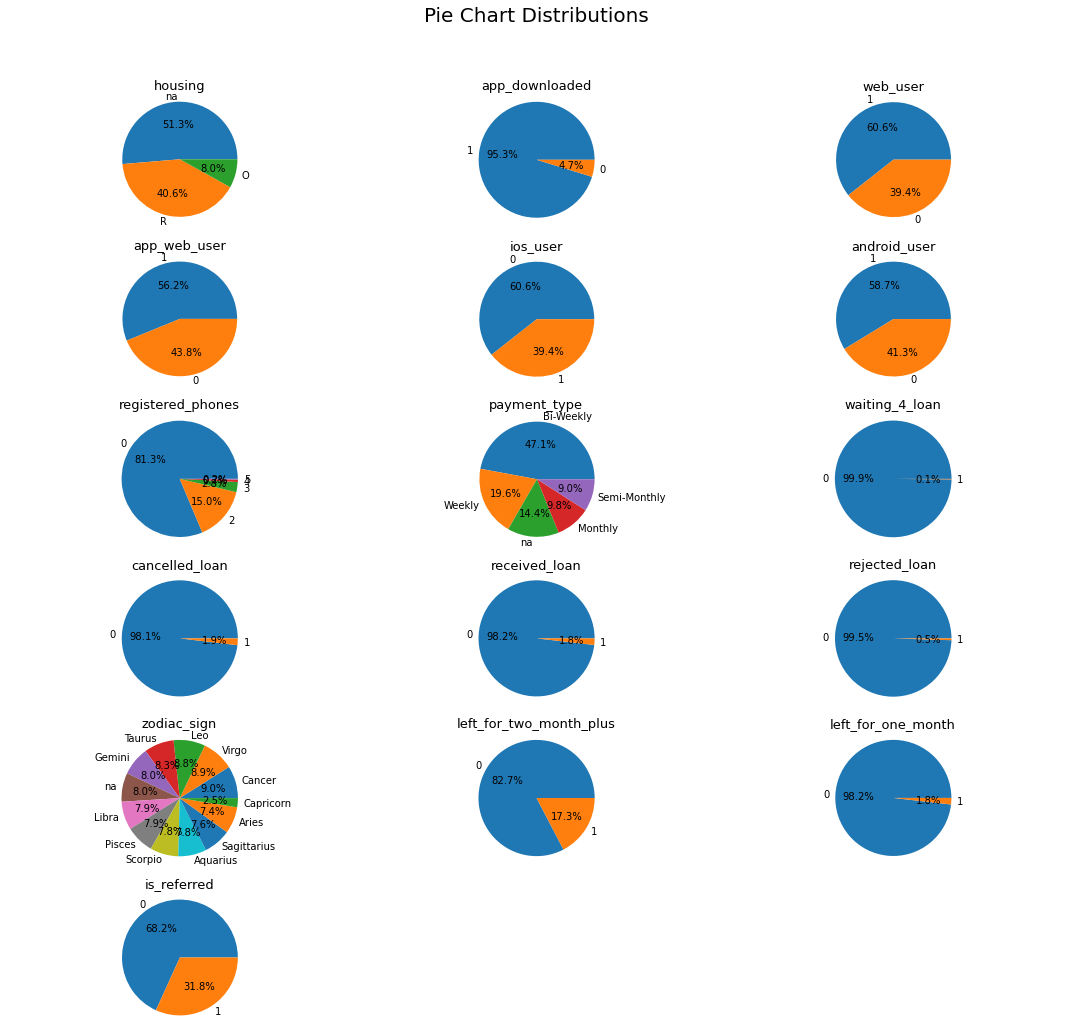

In [10]:
# Pie plots selecting only binary variables - check prevalence
dataset3 = dataset[["housing", "app_downloaded",
                    "web_user", "app_web_user", "ios_user",
                    "android_user", "registered_phones", "payment_type",
                    "waiting_4_loan", "cancelled_loan",
                    "received_loan", "rejected_loan", "zodiac_sign",
                    "left_for_two_month_plus", "left_for_one_month", "is_referred"]]

fig = plt.figure(figsize=(15, 15))
plt.suptitle("Pie Chart Distributions", fontsize=20)
for i in range(1, dataset3.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset3.columns.values[i - 1], fontsize=13)   
    values = dataset3.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset3.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct="%1.1f%%")
    plt.axis("equal")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

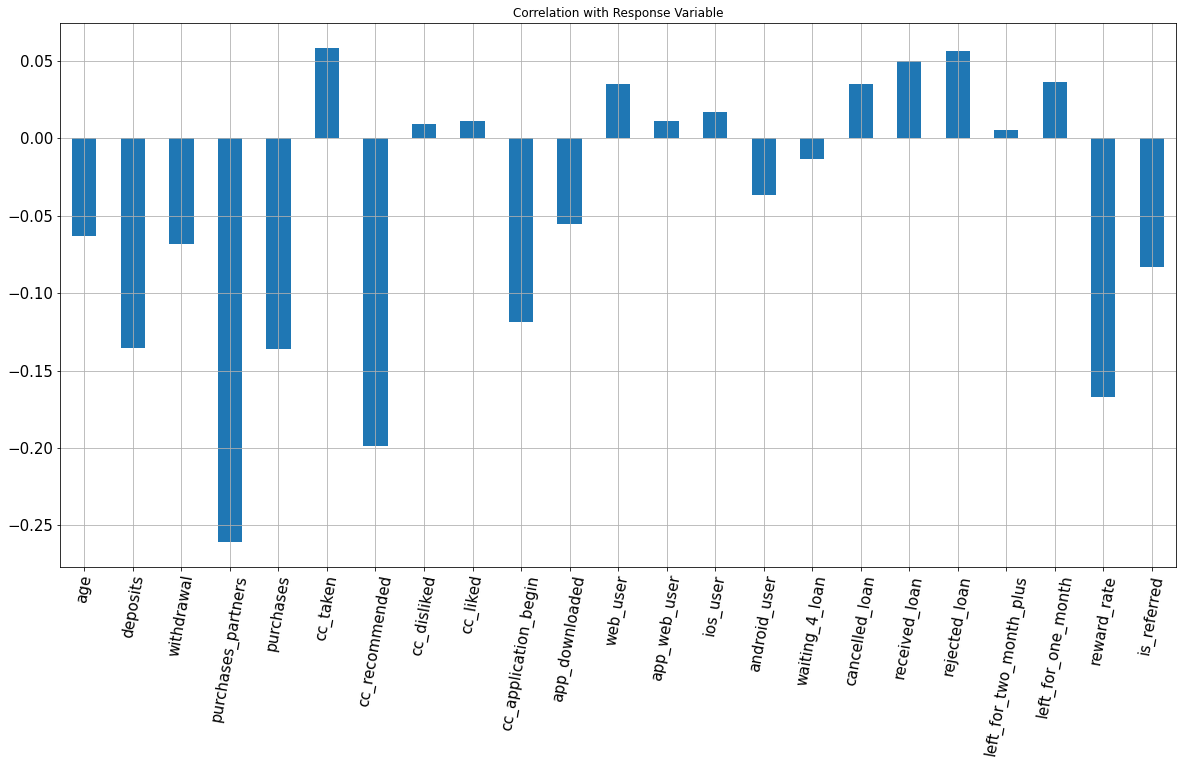

In [11]:
# Correlation with response variable
dataset2.drop(columns=[
    "housing",
    "payment_type",
    "registered_phones",
    "zodiac_sign"]).corrwith(dataset.churn).plot.bar(
    figsize=(20,10),
    title="Correlation with Response Variable",
    fontsize=15,
    rot=80,
    grid=True)

In [12]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [13]:
dataset.dtypes

user                         int64
churn                        int64
age                        float64
housing                     object
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
reward_rate                float64
is_referred         

In [14]:
# Encode categorical features
cats = [col for col in dataset.columns if dataset[col].dtype == "object"]
print("Categorical Features:", cats)

feature_encoder = OrdinalEncoder(dtype=np.int64)
dataset[cats] = feature_encoder.fit_transform(dataset[cats])
dataset.head()

Categorical Features: ['housing', 'payment_type', 'zodiac_sign']


,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,2,0,0,0,0,0,0,...,0,0,0,0,0,5,1,0,0.00,0
1,23547,0,28.0,1,0,0,1,0,0,96,...,3,0,0,0,0,5,0,0,1.47,1
2,58313,0,35.0,1,47,2,86,47,0,285,...,2,0,0,0,0,3,1,0,2.17,0
3,8095,0,26.0,1,26,3,38,25,0,74,...,0,0,0,0,0,3,0,0,1.10,1
4,61353,1,27.0,2,0,0,2,0,0,0,...,0,0,0,0,0,1,1,0,0.03,0


In [15]:
feature_encoder.categories_

[array(['O', 'R', 'na'], dtype=object),
 array(['Bi-Weekly', 'Monthly', 'Semi-Monthly', 'Weekly', 'na'],
       dtype=object),
 array(['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo',
        'Libra', 'Pisces', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo',
        'na'], dtype=object)]

<AxesSubplot:>

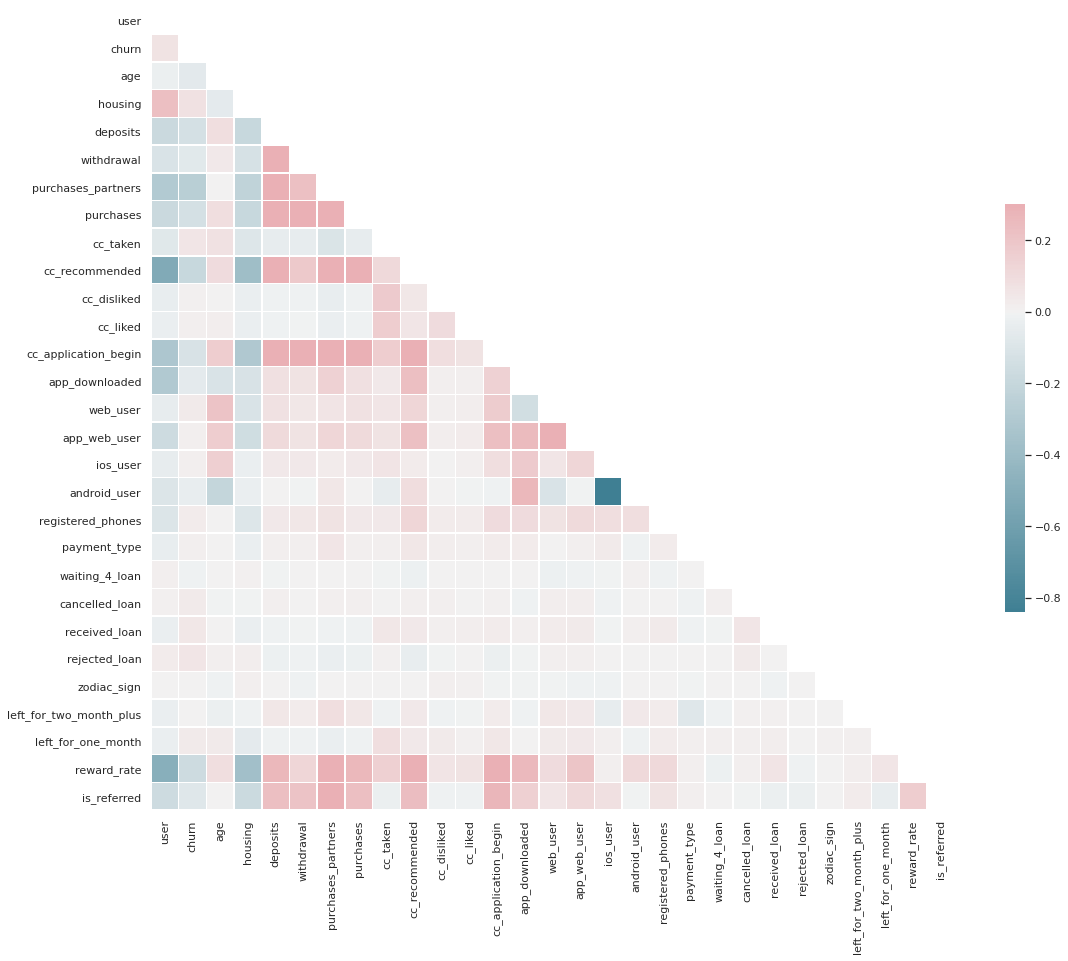

In [16]:
# Visualize correlation matrix
sns.set(style="white")
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Modeling

In [17]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,2,0,0,0,0,0,0,...,0,0,0,0,0,5,1,0,0.00,0
1,23547,0,28.0,1,0,0,1,0,0,96,...,3,0,0,0,0,5,0,0,1.47,1
2,58313,0,35.0,1,47,2,86,47,0,285,...,2,0,0,0,0,3,1,0,2.17,0
3,8095,0,26.0,1,26,3,38,25,0,74,...,0,0,0,0,0,3,0,0,1.10,1
4,61353,1,27.0,2,0,0,2,0,0,0,...,0,0,0,0,0,1,1,0,0.03,0


In [19]:
# Splitting the dataset into the train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    dataset.drop(columns="churn"),
    dataset["churn"],
    test_size=0.2,
    random_state=0)

print("Train dataset:", X_train.shape, y_train.shape)
print("Test dataset:", X_val.shape, y_val.shape)

Train dataset: (21596, 28) (21596,)
Test dataset: (5400, 28) (5400,)


In [20]:
# Target distribution 
print("Train target distribution:\n", y_train.value_counts())
print("Validation target distribution:\n", y_val.value_counts())

Train target distribution:
 0    12656
1     8940
Name: churn, dtype: int64
Validation target distribution:
 0    3166
1    2234
Name: churn, dtype: int64


In [25]:
# Instantiate model
classifier = RandomForestClassifier(n_estimators=1000, criterion="gini", max_depth=25, n_jobs=16, verbose=True, random_state=2021)

# Fit model to training dataset
classifier.fit(X=X_train, y=y_train)

# Evaluate on validation test
predicted = classifier.predict(X_val)

# Compute model accuracy
accuracy = accuracy_score(y_val, predicted)
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Recall: {:.2f}%".format(recall_score(y_val, predicted)*100))
print("Precision: {:.2f}%".format(precision_score(y_val, predicted)*100))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    2.2s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    2.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s


Accuracy: 72.52%
Recall: 57.70%
Precision: 70.51%


[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.2s finished


<AxesSubplot:>

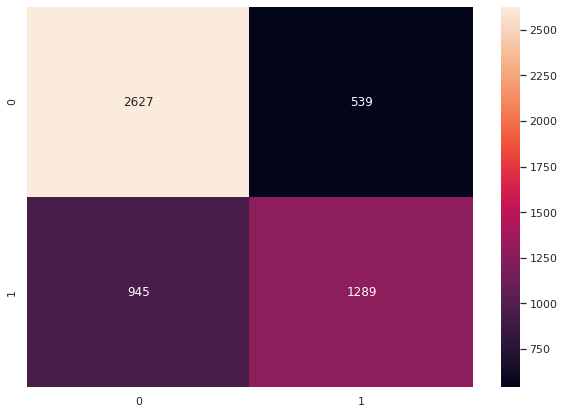

In [26]:
# Compute confusion matrix 
matrix = confusion_matrix(y_val, predicted)

# Visualize confusion matrix
matrix_df = pd.DataFrame(matrix, index=(0, 1), columns=(0, 1))

plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g")